## Analyzing pilot boat

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import src.data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 462 ('figure.figsize   : 5, 3   ## figure size in inches')
Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 463 ('figure.dpi       : 100        ## figure dots per inch')


In [3]:
reader = pd.read_csv(src.data.path_lots, chunksize=100000, iterator=True)  # Loading a small part of the data
df_raw = next(reader)
df_raw.set_index('Timestamp [UTC]', inplace=True)

In [4]:
df_raw.describe()

,Latitude (deg),Longitude (deg),Speed over ground (kts),Consumption ME all (L/h),Economy (L/nm),Charge air pressure ME1 (bar),Charge air pressure ME2 (bar),Charger air temp ME1 (°C),Charger air temp ME2 (°C),Consumption ME1 (L/h),Consumption ME2 (L/h),Coolant pressure ME1 (bar),Coolant pressure ME2 (bar),Coolant temp ME1 (°C),Coolant temp ME2 (°C),Engine load ME1 (%),Engine load ME2 (%),Engine speed ME1 (rpm),Engine speed ME2 (rpm),Exhaust temp ME1 (°C),Exhaust temp ME2 (°C),Fuel bunkering (manual) (L),Fuel pressure ME1 (bar),Fuel pressure ME2 (bar),Lube oil consumption port side (manual) (L),Lube oil consumption starboard side (manual) (L),Sea water pressure ME1 (bar),Sea water pressure ME2 (bar)
count,100000.000000,100000.000000,100000.000000,100000.000000,20311.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.0,100000.0,100000.000000,100000.000000
mean,57.678260,11.853593,2.313290,19.978080,6.154335,0.160867,0.160919,50.023730,48.52861,9.739588,10.238492,0.505279,0.469401,54.456450,52.578890,10.048240,10.373720,233.057520,237.50905,107.509670,109.002610,0.0,0.825890,0.779793,0.0,0.0,0.134782,0.096334
std,0.013939,0.057770,6.083637,61.351001,5.911433,0.536704,0.540521,24.027049,23.99431,30.072731,31.438251,0.698552,0.725604,26.977951,26.268164,25.475854,26.305005,574.769717,587.50329,132.553286,135.452389,0.0,1.834953,1.780835,0.0,0.0,0.338333,0.244850
min,57.588500,11.521210,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,17.00000,0.000000,0.000000,0.000000,0.000000,18.000000,17.000000,0.000000,0.000000,0.000000,0.00000,15.000000,15.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,57.682150,11.871840,0.000000,0.000000,2.018545,0.000000,0.000000,26.000000,24.00000,0.000000,0.000000,0.040000,0.000000,22.000000,21.000000,0.000000,0.000000,0.000000,0.00000,19.000000,19.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,57.682160,11.871850,0.000000,0.000000,5.402170,0.000000,0.000000,45.000000,44.00000,0.000000,0.000000,0.280000,0.220000,57.000000,56.000000,0.000000,0.000000,0.000000,0.00000,42.000000,42.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,57.682170,11.871860,0.000000,0.000000,10.514060,0.000000,0.000000,75.000000,74.00000,0.000000,0.000000,0.600000,0.560000,82.000000,79.000000,0.000000,0.000000,0.000000,0.00000,125.000000,127.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
max,57.691160,11.876980,27.000000,263.900000,108.600000,2.560000,2.400000,90.000000,88.00000,131.700000,132.300000,3.060000,3.060000,90.000000,89.000000,100.000000,100.000000,2253.999940,2265.99998,486.000000,511.000000,0.0,5.760000,5.640000,0.0,0.0,1.400000,1.100000


In [5]:
mask = df_raw.std() > 0
interesting=df_raw.columns[mask]
df = df_raw[interesting].copy()

mask = df['Speed over ground (kts)']>5
df=df.loc[mask]
df = df.iloc[0:10000]


In [6]:
df.describe()

,Latitude (deg),Longitude (deg),Speed over ground (kts),Consumption ME all (L/h),Economy (L/nm),Charge air pressure ME1 (bar),Charge air pressure ME2 (bar),Charger air temp ME1 (°C),Charger air temp ME2 (°C),Consumption ME1 (L/h),Consumption ME2 (L/h),Coolant pressure ME1 (bar),Coolant pressure ME2 (bar),Coolant temp ME1 (°C),Coolant temp ME2 (°C),Engine load ME1 (%),Engine load ME2 (%),Engine speed ME1 (rpm),Engine speed ME2 (rpm),Exhaust temp ME1 (°C),Exhaust temp ME2 (°C),Fuel pressure ME1 (bar),Fuel pressure ME2 (bar),Sea water pressure ME1 (bar),Sea water pressure ME2 (bar)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57.654574,11.750207,15.857600,138.932109,7.379835,1.140050,1.135226,38.928900,35.934600,67.981459,70.950650,1.932426,1.952682,85.020600,82.263000,66.448000,68.128000,1523.465400,1551.808999,393.815200,398.511800,5.033372,4.876404,0.883476,0.630140
std,0.030540,0.105940,7.120191,104.705178,3.484011,0.999077,1.009931,5.219326,3.875464,51.716627,53.585364,0.849094,0.916713,7.674964,7.445185,28.020964,29.186548,562.299619,582.983066,59.870775,61.288414,0.520958,0.564646,0.352823,0.270065
min,57.588500,11.521210,5.100000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,0.280000,0.320000,25.000000,22.000000,0.000000,0.000000,652.000010,347.000000,169.000000,214.000000,3.960000,3.520000,0.220000,0.120000
25%,57.633347,11.664817,9.300000,38.600000,4.167720,0.160000,0.120000,35.000000,34.000000,18.500000,19.500000,1.200000,1.140000,86.000000,83.000000,40.000000,40.000000,1004.000020,1025.000040,356.000000,357.000000,4.600000,4.360000,0.560000,0.380000
50%,57.664505,11.784880,12.700000,94.400000,7.787670,0.700000,0.720000,38.000000,36.000000,44.800000,50.000000,1.620000,1.660000,87.000000,84.000000,55.000000,58.000000,1375.999950,1417.000010,418.000000,427.000000,5.040000,4.800000,0.920000,0.660000
75%,57.681820,11.846422,23.800000,259.899990,10.747930,2.280000,2.220000,44.000000,38.000000,129.700000,130.200000,2.900000,2.980000,87.000000,85.000000,100.000000,100.000000,2145.999980,2187.000050,446.000000,444.000000,5.560000,5.440000,1.220000,0.880000
max,57.691160,11.876850,27.000000,263.400010,19.941750,2.560000,2.400000,55.000000,54.000000,131.700000,132.300000,3.060000,3.060000,90.000000,89.000000,100.000000,100.000000,2253.999940,2258.000110,469.000000,485.000000,5.760000,5.600000,1.400000,1.100000


In [7]:
df.columns

Index(['Latitude (deg)', 'Longitude (deg)', 'Speed over ground (kts)',
       'Consumption ME all (L/h)', 'Economy (L/nm)',
       'Charge air pressure ME1 (bar)', 'Charge air pressure ME2 (bar)',
       'Charger air temp ME1 (°C)', 'Charger air temp ME2 (°C)',
       'Consumption ME1 (L/h)', 'Consumption ME2 (L/h)',
       'Coolant pressure ME1 (bar)', 'Coolant pressure ME2 (bar)',
       'Coolant temp ME1 (°C)', 'Coolant temp ME2 (°C)', 'Engine load ME1 (%)',
       'Engine load ME2 (%)', 'Engine speed ME1 (rpm)',
       'Engine speed ME2 (rpm)', 'Exhaust temp ME1 (°C)',
       'Exhaust temp ME2 (°C)', 'Fuel pressure ME1 (bar)',
       'Fuel pressure ME2 (bar)', 'Sea water pressure ME1 (bar)',
       'Sea water pressure ME2 (bar)'],
      dtype='object')

In [8]:
interesting = [
              'Consumption ME all (L/h)',
               'Economy (L/nm)',
               'Speed over ground (kts)',
              'Engine speed ME1 (rpm)',
              'Engine speed ME2 (rpm)',
              
              ]
data = df[interesting].copy()
data.dropna(how='any', inplace = True)

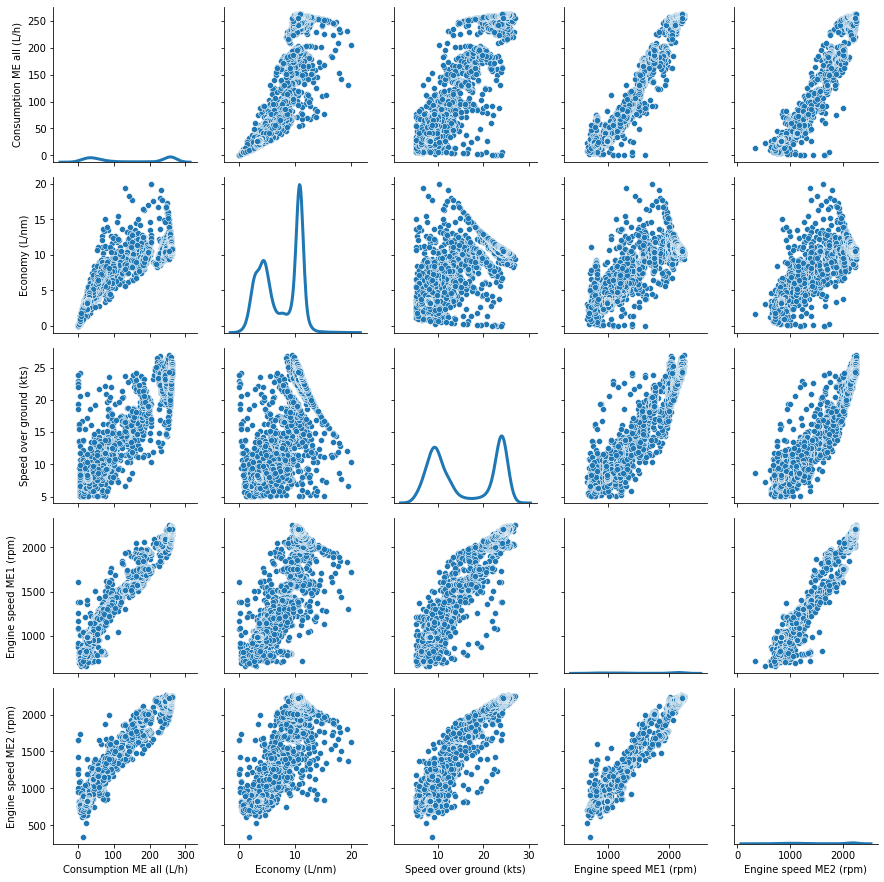

In [9]:
g = sns.PairGrid(data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [10]:
#g = sns.PairGrid(data)
#g.map_upper(sns.kdeplot)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.kdeplot, lw=3, legend=False);

## Regression

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

select_k_best = SelectKBest(score_func=f_regression, k=4)
standard_scaler = StandardScaler()
polynomial_features = PolynomialFeatures(degree=2)
linear_regression = LinearRegression()

steps = [
    ('scaler', standard_scaler),
    ('polynomial_features', polynomial_features),
    ('select_k_best', select_k_best),
    ('linear_regression', linear_regression),
]

pipeline_polynomial_scaled_selection = Pipeline(steps=steps)

In [12]:
#X = data[['Speed over ground (kts)']].copy()
#X['Engine speed'] = (data['Engine speed ME1 (rpm)'] + data['Engine speed ME2 (rpm)'])/2
#y = data['Consumption ME all (L/h)']                        

label_y = 'Speed over ground (kts)'
X = data[['Consumption ME all (L/h)']].copy()
X['Engine speed'] = (data['Engine speed ME1 (rpm)'] + data['Engine speed ME2 (rpm)'])/2
y = data[label_y]       

In [13]:
from sklearn.model_selection import GridSearchCV

# Decide how many k
max_degree = 5
no_features = len(X.columns)
polynomial_features = PolynomialFeatures(degree=max_degree)
polynomial_features.fit(np.array([np.arange(no_features)]))
max_k = len(polynomial_features.get_feature_names())


# define the grid
grid = dict()
grid['select_k_best__k'] = [i for i in range(1, max_k+1)]
grid['polynomial_features__degree'] = [i for i in range(1, max_degree+1)]

from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# define the grid search
search = GridSearchCV(estimator=pipeline_polynomial_scaled_selection, param_grid=grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
#search = GridSearchCV(estimator=pipeline_polynomial_scaled_selection, param_grid=grid, scoring='r2', n_jobs=-1, cv=cv)
# perform the search
search_result = search.fit(X, y)

c:\dev\datadriven-energieffektivisering-av-fartyg\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.88283451 -0.85452762 -0.85452762         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.88283451 -0.85452762 -0.70910817
 -0.66563785 -0.65325942 -0.65325942         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
 -0.88283451 -0.85452762 -0.85712907 -0.84304054 -0.81466942 -0.80802796
 -0.64575316 -0.63613476 -0.6363596  -0.6363596          nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.88283451 -0.85452762 -0.85712907
 -0.84304054 -0.81466942

In [14]:
model = search_result.best_estimator_

In [15]:
search_result.cv_results_['mean_test_score']

array([-0.88283451, -0.85452762, -0.85452762,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, -0.88283451, -0.85452762, -0.70910817, -0.66563785,
       -0.65325942, -0.65325942,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan, -0.88283451, -0.85452762, -0.85712907,
       -0.84304054, -0.81466942, -0.80802796, -0.64575316, -0.63613476,
       -0.6363596 , -0.6363596 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, -0.88283451, -0.85452762,
       -0.85712907, -0.84304054, -0.81466942, -0.80802796, -0.67

In [16]:
search_result.cv_results_['std_test_score']

array([0.01633725, 0.0165929 , 0.0165929 ,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.01633725, 0.0165929 , 0.01455653, 0.01240928,
       0.01184929, 0.01184929,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.01633725, 0.0165929 , 0.0134254 ,
       0.01207315, 0.01346723, 0.01356472, 0.01170037, 0.01159352,
       0.01138564, 0.01138564,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.01633725, 0.0165929 ,
       0.0134254 , 0.01207315, 0.01346723, 0.01356472, 0.01261291,
       0.01125135, 0.01136565, 0.01112167, 0.01072411, 0.01045

In [17]:
cv_results_ = search_result.cv_results_
df_search = pd.DataFrame()
for param, mean_test_score, std_test_score in zip(cv_results_['params'],cv_results_['mean_test_score'],cv_results_['std_test_score']):
    r_ = pd.Series(param)
    r_['mean_test_score'] = mean_test_score
    r_['std_test_score'] = std_test_score
    df_search = df_search.append(r_, ignore_index=True)


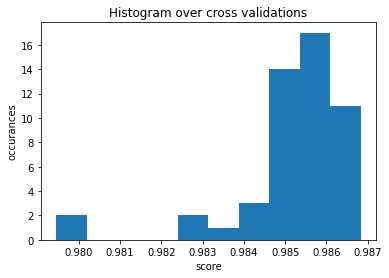

In [18]:
scores = cross_val_score(estimator=model, X=X, y=y, scoring='r2', cv=cv, n_jobs=-1)

fig,ax = plt.subplots()
ax.hist(scores);
ax.set_xlabel('score')
ax.set_ylabel('occurances')
ax.set_title('Histogram over cross validations');

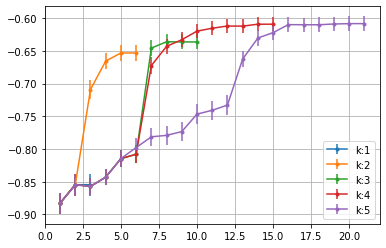

In [19]:
fig,ax=plt.subplots()

for k, group in df_search.groupby('polynomial_features__degree'):
    
    label = 'k:%i' % k
    ax.errorbar(group['select_k_best__k'], group['mean_test_score'], yerr=group['std_test_score'], linestyle='-', marker='.', label=label)
    
ax.grid()
ax.legend()    

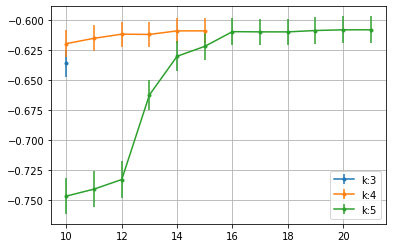

In [20]:
fig,ax=plt.subplots()

mask = ((df_search['select_k_best__k'] >= 10) &
        (df_search['polynomial_features__degree'] >= 3)
       )
df_search_zoom = df_search.loc[mask].copy()

for k, group in df_search_zoom.groupby('polynomial_features__degree'):
    
    label = 'k:%i' % k
    ax.errorbar(group['select_k_best__k'], group['mean_test_score'], yerr=group['std_test_score'], linestyle='-', marker='.', label=label)
    
ax.grid()
ax.legend() 

In [21]:
select_k_best = SelectKBest(score_func=f_regression, k=4)
standard_scaler = StandardScaler()
polynomial_features = PolynomialFeatures(degree=15)
linear_regression = LinearRegression()

steps = [
    ('scaler', standard_scaler),
    ('polynomial_features', polynomial_features),
    ('select_k_best', select_k_best),
    ('linear_regression', linear_regression),
]

model = Pipeline(steps=steps)
model.fit(X=X, y=y)

c:\dev\datadriven-energieffektivisering-av-fartyg\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
c:\dev\datadriven-energieffektivisering-av-fartyg\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_features', PolynomialFeatures(degree=15)),
                ('select_k_best',
                 SelectKBest(k=4,
                             score_func=<function f_regression at 0x00000275DFBCF550>)),
                ('linear_regression', LinearRegression())])

Text(0, 0.5, 'Speed over ground (kts)')

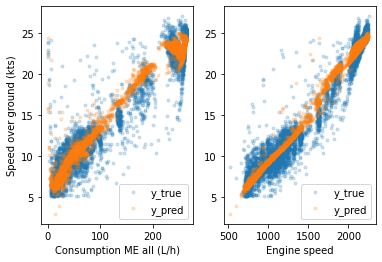

In [22]:
result = X.copy()
result['y_true'] = y
result['y_pred'] = model.predict(X=X)

fig,axes=plt.subplots(ncols=len(X.columns))
for x,ax in zip(X, axes):
    result.plot(x=x, y='y_true', ax=ax, style='.', alpha=0.2)
    result.plot(x=x, y='y_pred', ax=ax, style='.', alpha=0.2)
    
axes[0].set_ylabel(label_y)

In [23]:
from src.visualization.polynom import model_to_string,model_to_sympy
features = X.columns
print(model_to_string(model=model, feature_names=features))

16.213860 + 5.308575*Consumption ME all (L/h) + 3.547808*Engine speed  -5.773057*Consumption ME all (L/h)^3 + 4.161034*Consumption ME all (L/h)^2*Engine speed


In [24]:
features_latex = {
    'Consumption ME all (L/h)' : r'Pe',
    'Engine speed' : r'n', 
    }
latex_features = [features_latex[key] for key in features]

eq = model_to_sympy(model=model, feature_names=latex_features, label='V')
eq

Eq(V, -5.773057*Pe**3 + 4.161034*Pe**2*n + 5.308575*Pe + 3.547808*n + 16.21386)